In [1]:
import time

import matplotlib.pyplot as plt
from utils import *
import plotly.express as px
import scipy

In [2]:
!python -m serial.tools.list_ports

/dev/ttyACM0        
/dev/ttyUSB0        
2 ports found


In [4]:
port = "/dev/ttyUSB0"

In [10]:
df = read_measurements_df_oldDAQ(port=port, duration=5)

Reading measurements...
Read!


In [13]:
mean = df.mean()

In [20]:
mean.sensor_6

-0.26664935596860373

In [104]:
df_smooth = df.copy()
y = df_smooth[sensors_col]
df_smooth[sensors_col] = savgol_filter(y, 10, 3, axis=0)

In [121]:
px.line(df,x='timestamp', y=[f'sensor_{i}' for i in range(1,7)])

In [122]:
px.line(df,x='timestamp', y=[f'sensor_{i}' for i in range(1,7)])

In [ ]:
calibration = df.drop('timestamp', axis=1).median()

In [ ]:
df_calibrated = df - calibration
df_calibrated.timestamp = df.timestamp

In [ ]:
df_calibrated.plot(x='timestamp')

In [ ]:
#df.drop('timestamp', axis=1).median().to_csv('sensor_calibration.csv', index_label=False)

In [ ]:
#a = pd.read_csv('sensor_calibration.csv')

In [ ]:
df.to_csv('dynamic_sensor_data.csv', index_label=False)

In [ ]:
df_calibrated = df - df.drop('timestamp', axis=1).median()

In [ ]:
df_calibrated.timestamp = df.timestamp

In [ ]:
df.drop('timestamp', axis=1).median()

In [ ]:
df_calibrated.plot(x='timestamp')
plt.show()

In [ ]:
(df_calibrated.drop('timestamp', axis=1)**2).mean().sum()

In [ ]:
df.plot(x='timestamp')
plt.show()

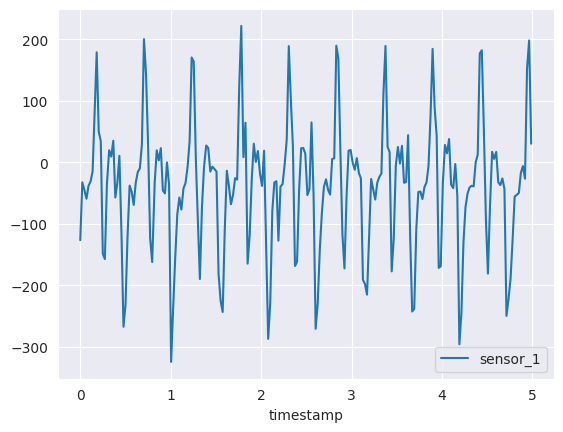

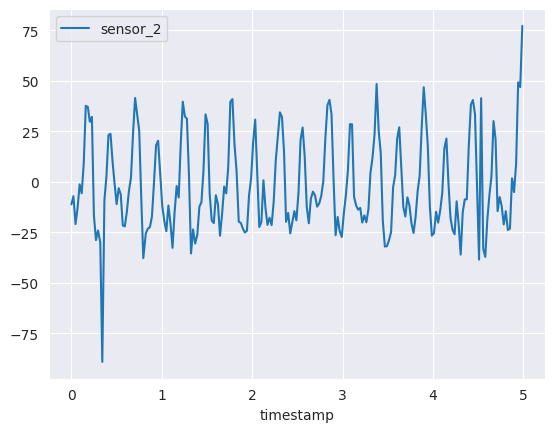

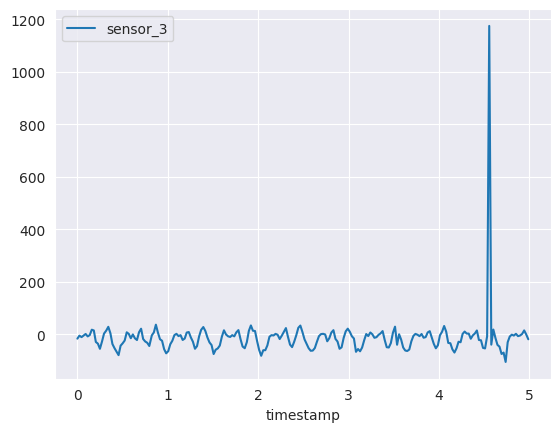

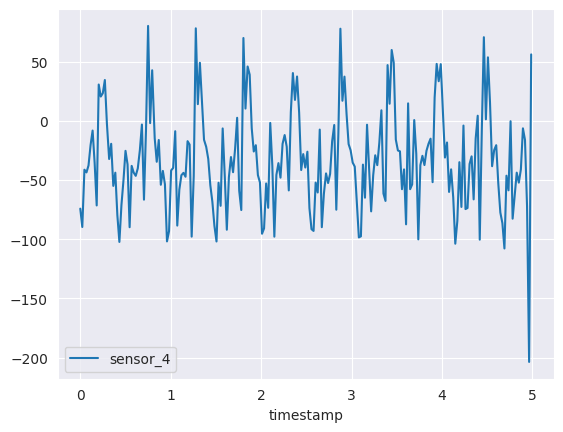

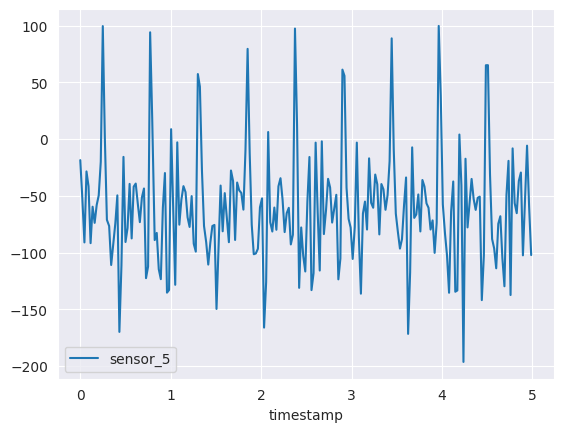

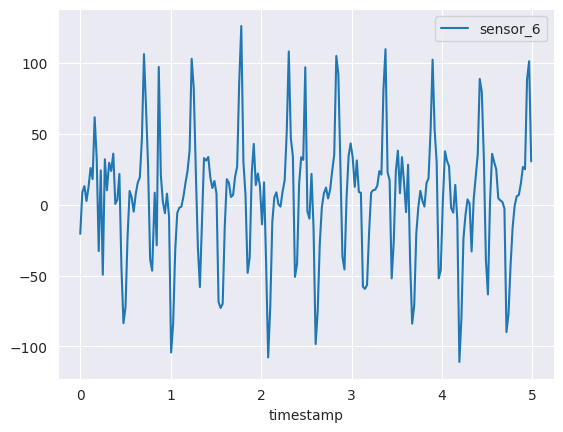

In [68]:
for sensor in sensors_col:
    df.plot(x='timestamp', y=sensor)
    plt.show()

In [ ]:
df.mean()

In [ ]:
df.to_csv("sensor_comparison/python.csv", index=False)

In [ ]:
fig = px.line(df,x='timestamp', y=[f'sensor_{i}' for i in range(1,7)]+['lift', 'thrust'])
#fig.show()
fig.write_html('sensor_comparison/pyhton.html')